In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/sample_data/dataset.csv')
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10245,12.0,209.375,0,0.0,43,2754.117424,0.004687,0.033875,13.681089,0.0,Dec,3.0,2,3,2,Returning_Visitor,False,False
1370,1.0,31.000,0,0.0,6,25.500000,0.066667,0.083333,0.000000,0.0,Mar,3.0,2,3,1,Returning_Visitor,False,False
4660,0.0,0.000,0,0.0,2,139.000000,0.000000,0.100000,0.000000,0.8,May,NaN,2,1,4,Returning_Visitor,False,False
6327,0.0,0.000,0,0.0,14,NaN,0.000000,0.016667,0.000000,0.0,Nov,3.0,2,1,20,Returning_Visitor,False,False
12358,0.0,0.000,0,0.0,11,304.000000,0.000000,0.018182,0.000000,0.0,May,2.0,2,3,4,Returning_Visitor,False,False
1972,3.0,78.000,0,0.0,3,NaN,0.033333,0.066667,0.000000,0.0,Mar,2.0,2,7,2,New_Visitor,True,False
6886,6.0,101.200,2,438.7,53,1692.694155,0.012069,0.022198,0.000000,0.0,Aug,3.0,2,4,1,Returning_Visitor,False,False
1754,0.0,0.000,0,0.0,2,171.000000,0.000000,0.100000,0.000000,0.0,Mar,NaN,2,2,2,Returning_Visitor,True,False
8815,0.0,0.000,4,37.0,69,4112.394444,NaN,0.022355,0.000000,0.0,Dec,3.0,2,3,2,Returning_Visitor,False,False
3139,4.0,99.500,0,0.0,46,953.068687,0.000000,0.014286,0.000000,0.0,May,1.0,1,6,4,Returning_Visitor,True,False


In [ ]:
# Observasi Data
print(df.info()) # Informasi variabel
print('---'*20, '\n')
print((df.isna().mean() * 100).round(2)) # Persentase missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [ ]:
print(f'{(df.duplicated().mean() * 100).round(2)} %')

5.49 %


In [ ]:
 df.columns = df.columns.str.lower()
print(df.columns)

Index(['administrative', 'administrative_duration', 'informational',
       'informational_duration', 'productrelated', 'productrelated_duration',
       'bouncerates', 'exitrates', 'pagevalues', 'specialday', 'month',
       'operatingsystems', 'browser', 'region', 'traffictype', 'visitortype',
       'weekend', 'revenue'],
      dtype='object')


In [ ]:
cat = ['month', 'visitortype', 'browser', 'region', 'traffictype', 'weekend']
num = ['administrative', 'administrative_duration', 'informational', 'informational_duration', 'productrelated',
       'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues', 'specialday', 'operatingsystems', 'revenue']

In [ ]:
df[cat] = df[cat].astype(str)
df[cat].describe()

,month,visitortype,browser,region,traffictype,weekend
count,12946,12946,12946,12946,12946,12946
unique,10,3,13,9,20,2
top,May,Returning_Visitor,2,1,2,False
freq,3533,11072,8360,5031,4100,9929


In [ ]:
df[num].describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems
count,12835.000000,12313.000000,12946.000000,12946.000000,12946.000000,12307.000000,12872.000000,12946.000000,12946.000000,12946.000000,12422.000000
mean,2.303857,80.370267,0.498841,34.136048,31.657655,1192.740077,0.022309,0.043266,5.875963,0.061270,2.123169
std,3.314427,175.494016,1.263276,140.022848,44.202635,1910.216261,0.048681,0.048808,18.414670,0.198667,0.906264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,182.083333,0.000000,0.014286,0.000000,0.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,599.583333,0.003112,0.025329,0.000000,0.000000,2.000000
75%,4.000000,92.933333,0.000000,0.000000,38.000000,1470.522917,0.016933,0.050000,0.000000,0.000000,3.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000


In [ ]:
for col in df:
  print(f'value count of column {col}')
  print(df[col].value_counts())
  print('---'*20, '\n')

value count of column administrative
0.0     6020
1.0     1412
2.0     1171
3.0      944
4.0      786
5.0      599
6.0      450
7.0      345
8.0      300
9.0      234
10.0     158
11.0     106
12.0      90
13.0      57
14.0      45
15.0      39
16.0      26
17.0      16
18.0      14
19.0       6
24.0       4
22.0       4
23.0       3
21.0       2
20.0       2
27.0       1
26.0       1
Name: administrative, dtype: int64
------------------------------------------------------------ 

value count of column administrative_duration
0.000000       5893
4.000000         55
5.000000         54
7.000000         45
11.000000        42
               ... 
1013.171429       1
191.200000        1
92.571429         1
112.900000        1
150.357143        1
Name: administrative_duration, Length: 3223, dtype: int64
------------------------------------------------------------ 

value count of column informational
0     10202
1      1087
2       760
3       401
4       228
5       103
6        81
7      

Kesimpulan pada Observasi data ini adalah:
* Tipe data kurang lebih sudah sesuai.
* Terdapat nilai kosong pada kolom: 'administrative', 'administrative_duration', 'productrelated_duration', 'bouncerates', 'operatingsystems'. Namun karena persentase nilai kosong masih dibawah 5%, maka diputuskan untuk menghapus nilai kosong tersebut.
* Pada 'specialday'memiliki value dibawah koma, asumsi kami 'specialday' merupakan tipe boolean dengan indikator transaksi dilakukan pada hari biasa atau tidak.



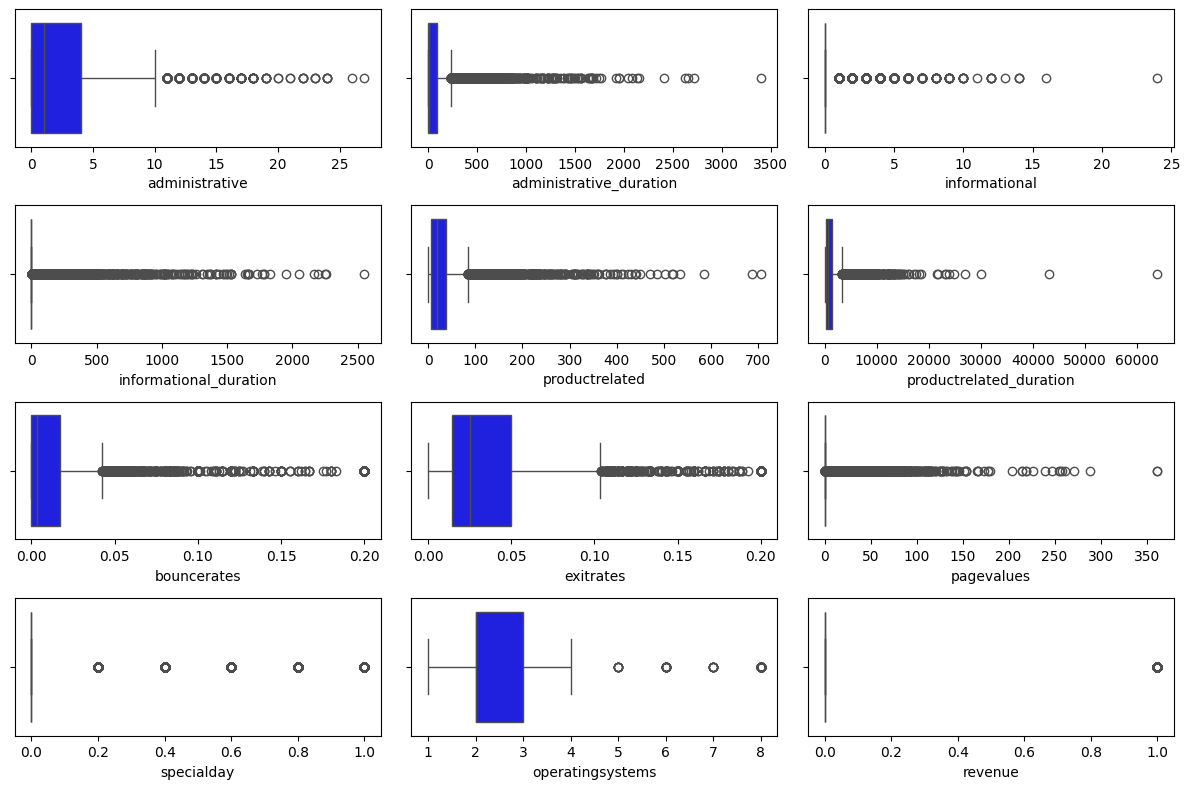

In [ ]:
plt.figure(figsize=(12,8))

for i in range(0, len(num)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[num[i]], color='blue')
    plt.xlabel(num[i])  # Use the column name as the label
    plt.tight_layout()

plt.show()

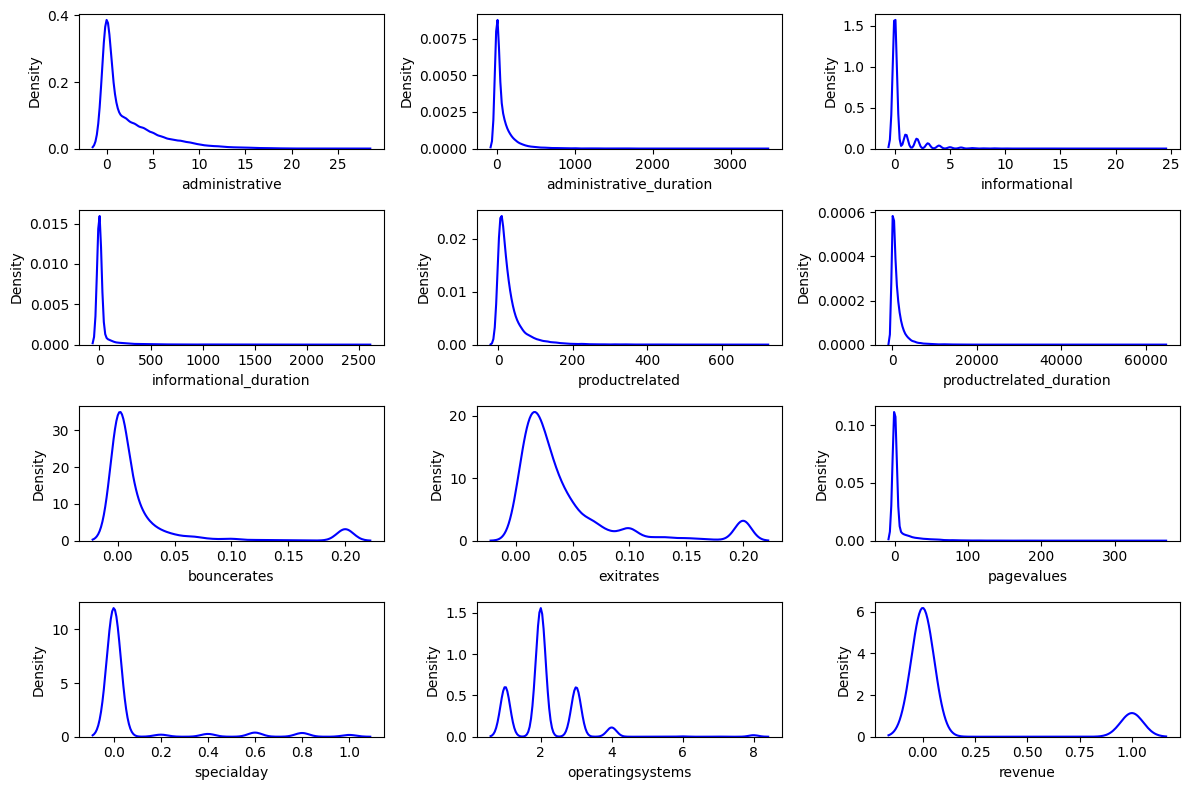

In [ ]:
plt.figure(figsize=(12,8))

for i in range(0, len(num)):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(x=df[num[i]], color='blue')
    plt.xlabel(num[i])  # Use the column name as the label
    plt.tight_layout()

plt.show()

In [ ]:
threshold = 500

def grouping(value, threshold):
    if int(value) <= threshold:
        return 'others'
    else:
        return value

counts = {}
for col in df.columns:
    counts[col] = df[col].value_counts()

# Applying grouping function to 'browser' column
df['browser'] = df['browser'].apply(lambda x: grouping(x, threshold) if counts['browser'][x] <= threshold else x)

# Applying grouping function to 'traffictype' column
df['traffictype'] = df['traffictype'].apply(lambda x: grouping(x, threshold) if counts['traffictype'][x] <= threshold else x)

print(df[['browser', 'traffictype']])

      browser traffictype
0           1           1
1           2           2
2           1           3
3           2           4
4      others           4
...       ...         ...
12941       2          13
12942       2           1
12943  others           3
12944       2      others
12945  others           3

[12946 rows x 2 columns]


In [ ]:
print(df['operatingsystems'].value_counts())

2.0    6673
1.0    2590
3.0    2571
4.0     480
8.0      78
6.0      17
7.0       7
5.0       6
Name: operatingsystems, dtype: int64


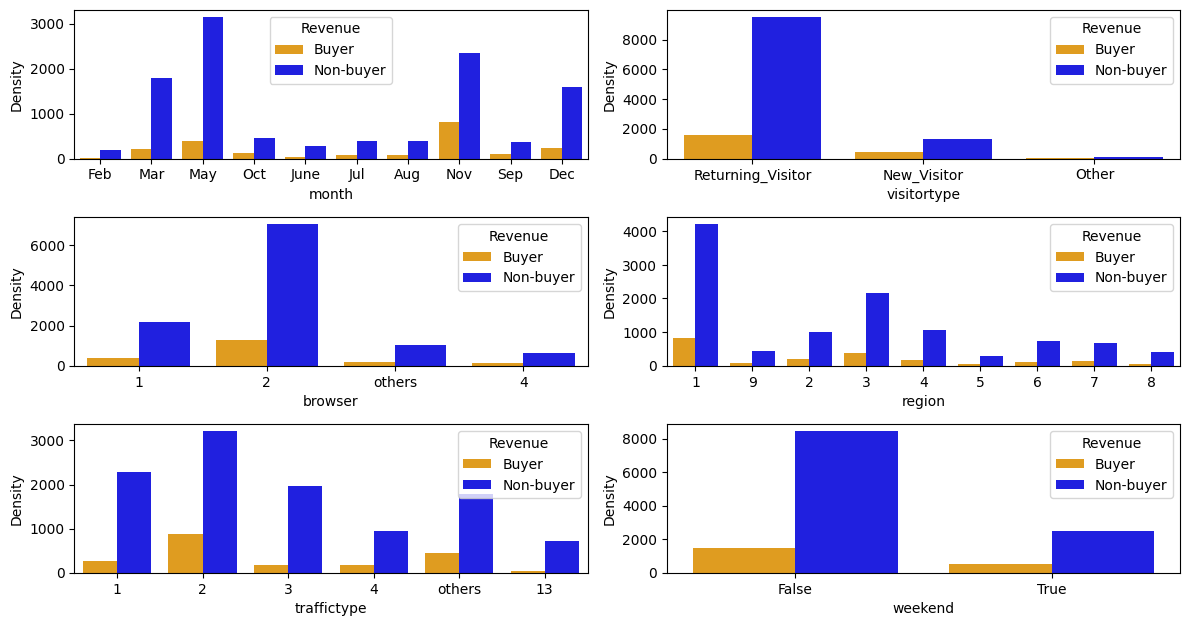

In [ ]:
plt.figure(figsize=(12, 8))

for i in range(0, len(cat)):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=cat[i], data=df, color='blue', hue='revenue',
                  palette={True: 'orange', False: 'blue'},
                  hue_order=[True, False])
    plt.xlabel(cat[i])
    plt.ylabel('Density')
    plt.legend(title='Revenue', labels=['Buyer', 'Non-buyer'])
    plt.tight_layout()

plt.show()

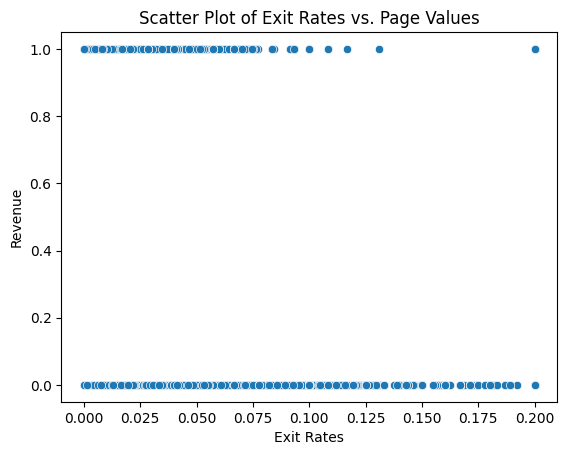

In [ ]:
sns.scatterplot(data=df, x='exitrates', y='revenue')
plt.xlabel('Exit Rates')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Exit Rates vs. Page Values')
plt.show()

Kesimpulan pada Univariate Analysis ini adalah:

* Variabel numerikal valuenya semua memiliki distribusi skewed (Ada kemungkinan data memiliki outliers)
* Pengguna online shop paling tinggi menggunakan di bula Mei (Namun perlu diperhatikan terkait validasi bulan ini, kemungkinan bulan ramadhan sehingga meningkatkan pengguna aplikasi secara signifikan), kemudian disusul bulan Nov dan Dec
* Link serta browser dari situs web yang banyak digunakan adalah link 2
* Region 1 menjadi wilayah yang banyak pengguna aplikasi online shop



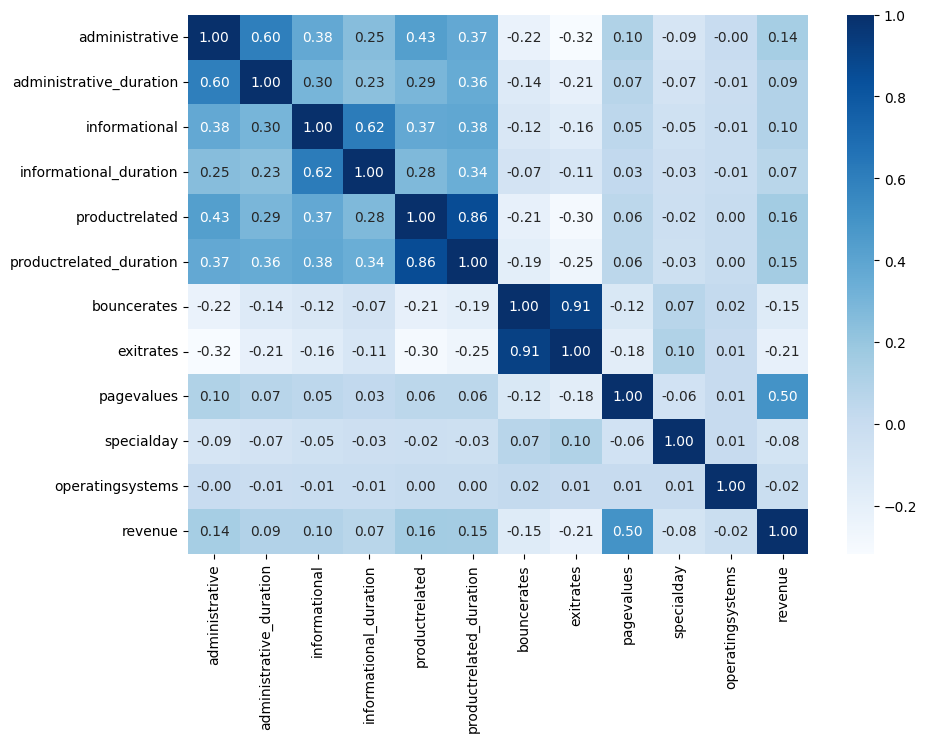

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

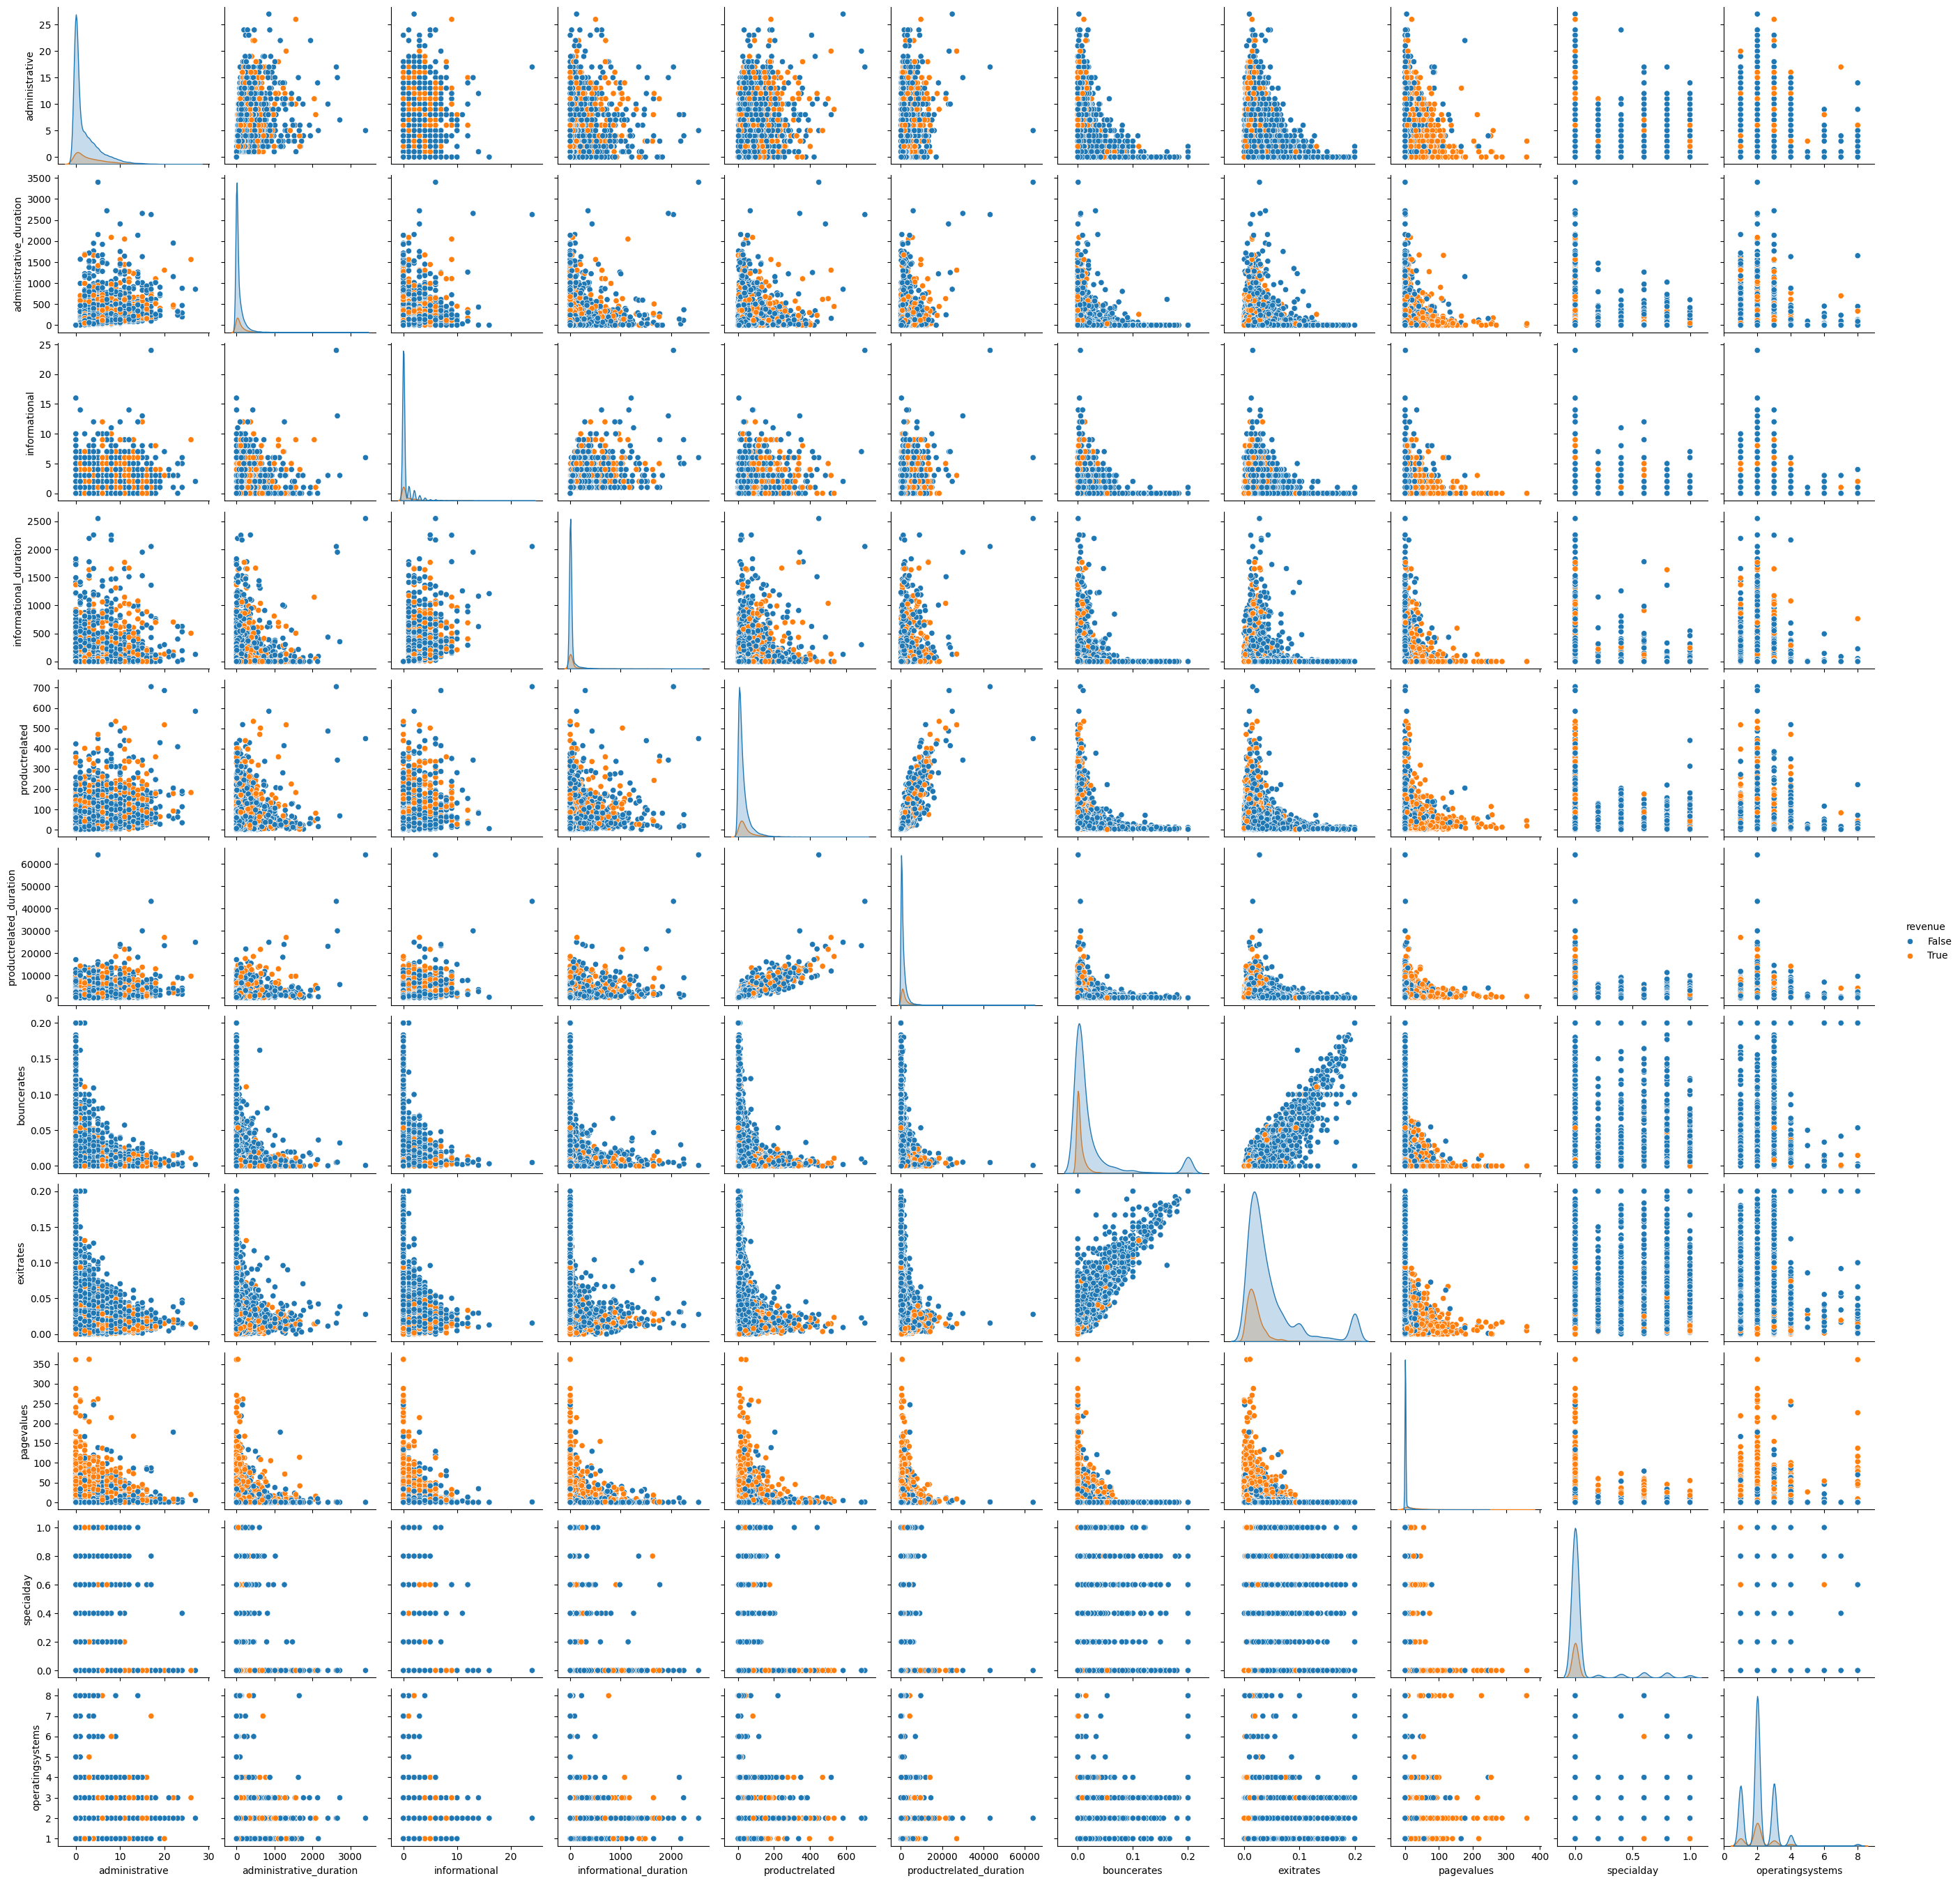

In [ ]:
sns.pairplot(df[num], diag_kind='kde',
             hue='revenue')
plt.show()

Keismpulan pada multivariate analysis adalah:
*   Terdapat korelasi yang kuat antara page values dengan revenue, sehingga apabila kita ingin meningkatkan pelanggan berakhir pada transaksi adalah dengan meningkatkan page value.
*   Bounce rate dan exit rate memiliki korelasi negatif, dengan demikian platform perlu menekan tingginya bounce rate dan juga exit rate agar pelanggan terus menggunakan platform yang nantinya akan mendorong kepada transaksi.

